# Q2.Titanic survived Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

### https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [2]:
df  = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Dropping cabin columns

df.drop(columns=['Cabin'],inplace=True)

In [9]:
# imputing missing values for age
#Strategy - mean

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
# Imputing missing values for embarked
# finding the most appeared value in embarked columns

df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# S is the most appeared value in this column
df['Embarked'].fillna('S',inplace = True)

In [12]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Changing data type for the fllowing cols

In [14]:
df['Survived']= df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

we can see here now there is no missing values.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [17]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


Out of 891 62 % people died in the accident


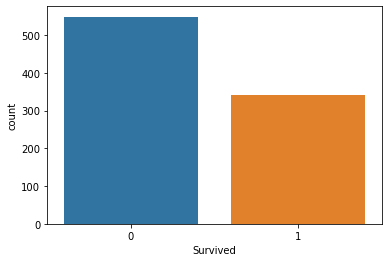

In [19]:
# lets start with the survived col
sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print('Out of 891 {} % people died in the accident'.format(death_percent))

Here we can see out of 891 62% people died.
and also we can say that percentage of died people is higher then survived people.

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

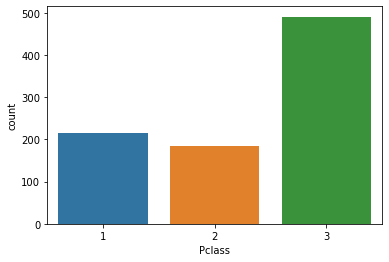

In [20]:
print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

# Pclass was the most crowded class

Conclusion is that most of peoples ar travlling in Pclass3

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

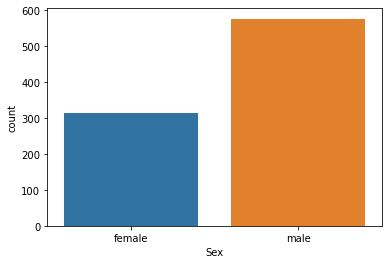

In [21]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'])

Here we can see percentages of male is higher than % of female.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

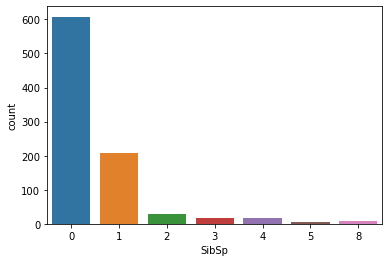

In [22]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<AxesSubplot:xlabel='Parch', ylabel='count'>

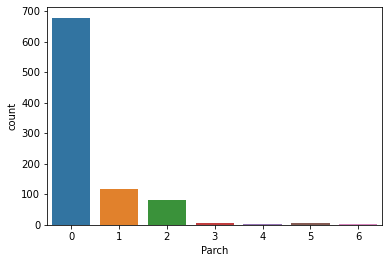

In [23]:
print((df['Parch'].value_counts()/891)*100)
sns.countplot(df['Parch'])

In this we conclude that the %of Alone People is higher than te others

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

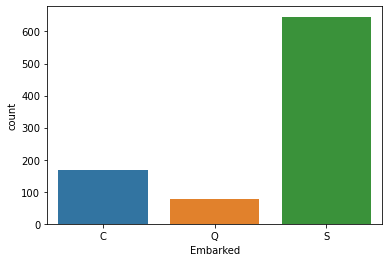

In [24]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(df['Embarked'])

in this colum we conclude that the most of people are going to S city.

0.45956263424701577
0.9865867453652877


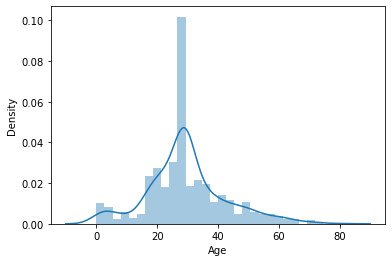

In [25]:
# Age column
sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

its looks like almost normaldistribution

<AxesSubplot:xlabel='Age'>

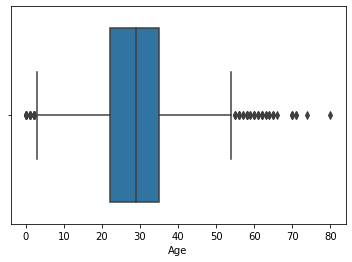

In [26]:
sns.boxplot(df['Age'])

4.787316519674893
33.39814088089868


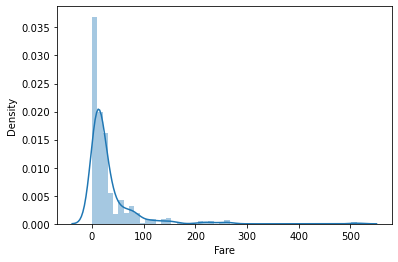

In [27]:
# fare column
sns.distplot(df['Fare'])

print(df['Fare'].skew())
print(df['Fare'].kurt())

In [28]:
from scipy.stats import skew

In [29]:
df["Fare"] = np.sqrt(df["Fare"])

In [30]:
skew(df["Fare"])

2.081492666998587

<AxesSubplot:xlabel='Fare'>

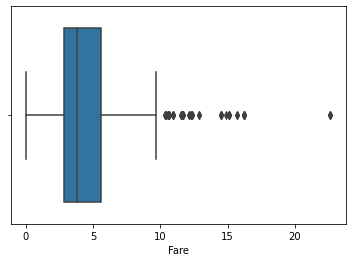

In [31]:
sns.boxplot(df['Fare'])

### Conclusion

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


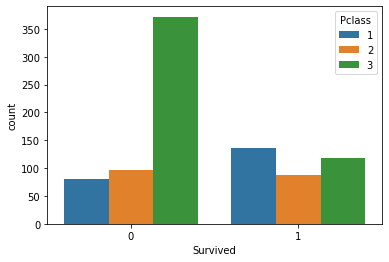

In [32]:
# multivariant Analysis
# Survival with Pclass

sns.countplot(df['Survived'],hue=df['Pclass'])

pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

In Pclass3 %of died people higher then other

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


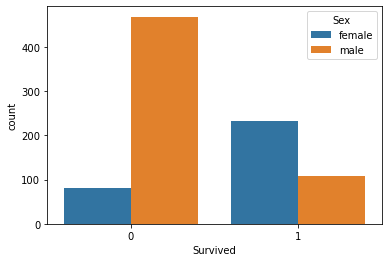

In [33]:
#survivel with sex
sns.countplot(df['Survived'],hue=df['Sex'])

pd.crosstab(df['Sex'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


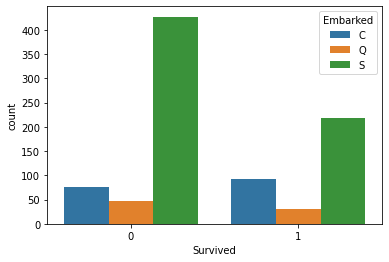

In [34]:
# Survival with Embarked
sns.countplot(df['Survived'],hue=df['Embarked'])

pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

<AxesSubplot:xlabel='Age', ylabel='Density'>

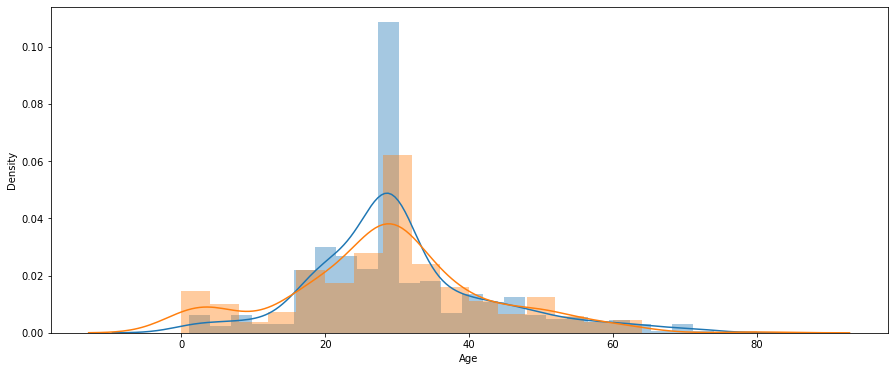

In [35]:
# survived with age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

here we can see the deth rate of 15 to 16 age people is higher then the childens and the olders

<AxesSubplot:xlabel='Fare', ylabel='Density'>

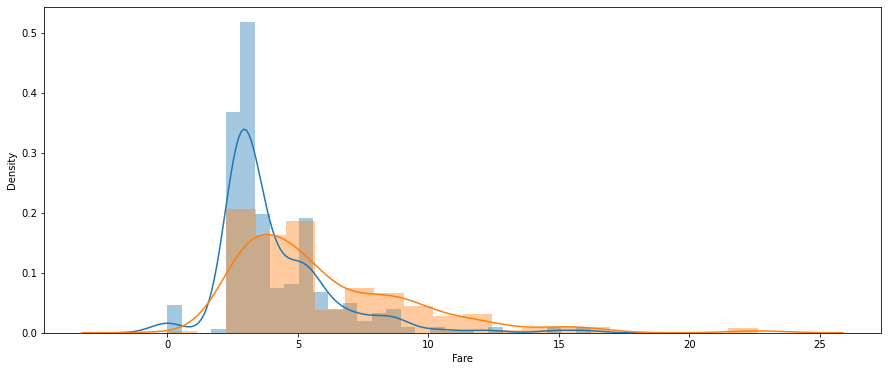

In [36]:
# Survived with fare
plt.figure (figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

Here we obseve that the people who spend more money there deth rate is low as compare to those people who spend less money.

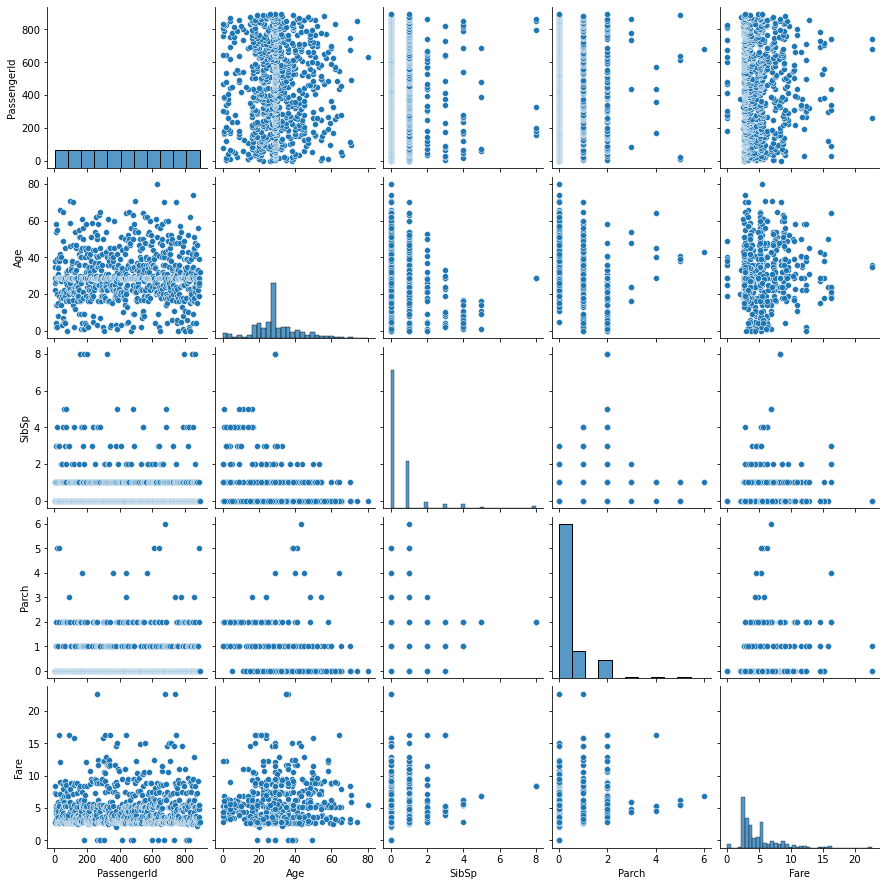

In [37]:
sns.pairplot(df)

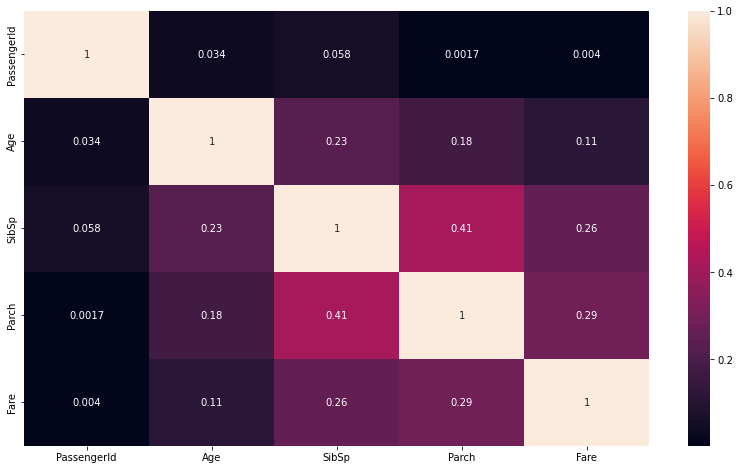

In [38]:
df_corr = df.corr().abs() 

plt.figure(figsize = (14,8))
sns.heatmap (df_corr, annot = True,annot_kws={'size':10}) 
plt.show()

In [39]:
# future Engineering
# we will create a new column by th name of family which will be the sum of SibSb and Parch cols
df ['family_size']=df['Parch']+df['SibSp']

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,2.692582,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,8.442944,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,2.815138,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,7.286975,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,2.837252,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,3.605551,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,5.477226,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,4.842520,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,5.477226,C,0


In [41]:
# Now we will enginner a fature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [42]:
df['family_type']=df['family_size'].apply(family_type)

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,2.692582,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,8.442944,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,2.815138,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,7.286975,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,2.837252,S,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,3.605551,S,0,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,5.477226,S,0,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,4.842520,S,3,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,5.477226,C,0,Alone


In [44]:
# now there is no need Sibsp,parch and family size
df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,2.692582,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,8.442944,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,2.815138,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,7.286975,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,2.837252,S,Alone
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,3.605551,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,5.477226,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,W./C. 6607,4.842520,S,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,5.477226,C,Alone


In [46]:
pd.crosstab(df['family_type'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [47]:
# one hot encoding

df

# cols to be transformed are Pclass,Sex,Embarked,family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,2.692582,0,1,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,8.442944,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,2.815138,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,7.286975,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,2.837252,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,3.605551,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,5.477226,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,4.842520,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,5.477226,0,0,1,0,0,0,0


In [48]:
df = pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)

<AxesSubplot:>

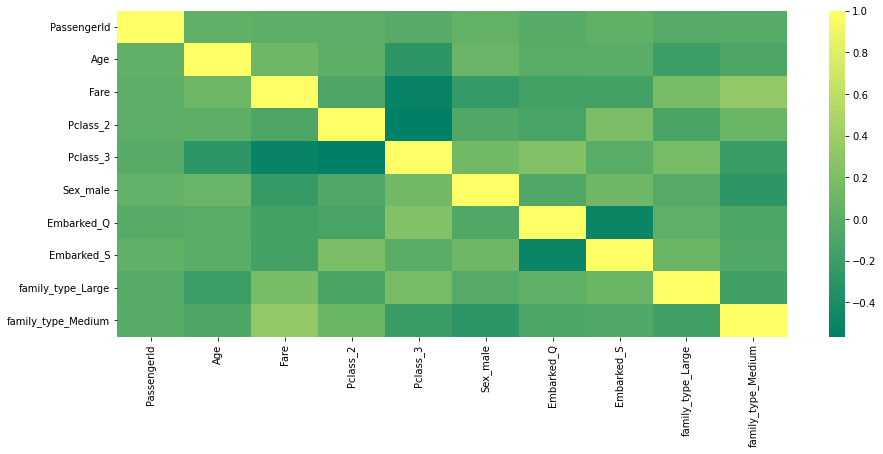

In [49]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap ='summer')


# Conclusion:

In [50]:
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)

In [51]:
df

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,22,2.692582,0,1,1,0,1,0,1
1,1,38,8.442944,0,0,0,0,0,0,1
2,1,26,2.815138,0,1,0,0,1,0,0
3,1,35,7.286975,0,0,0,0,1,0,1
4,0,35,2.837252,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27,3.605551,1,0,1,0,1,0,0
887,1,19,5.477226,0,0,0,0,1,0,0
888,0,29,4.842520,0,1,0,0,1,0,1
889,1,26,5.477226,0,0,1,0,0,0,0


In [52]:
df.dtypes

Survived              category
Age                      int32
Fare                   float64
Pclass_2                 uint8
Pclass_3                 uint8
Sex_male                 uint8
Embarked_Q               uint8
Embarked_S               uint8
family_type_Large        uint8
family_type_Medium       uint8
dtype: object

### Seprating Features and label

In [53]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [54]:
x

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,22,2.692582,0,1,1,0,1,0,1
1,38,8.442944,0,0,0,0,0,0,1
2,26,2.815138,0,1,0,0,1,0,0
3,35,7.286975,0,0,0,0,1,0,1
4,35,2.837252,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,27,3.605551,1,0,1,0,1,0,0
887,19,5.477226,0,0,0,0,1,0,0
888,29,4.842520,0,1,0,0,1,0,1
889,26,5.477226,0,0,1,0,0,0,0


In [55]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

### Using Standard Scalarization

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,-0.580044,-0.733117,-0.510152,0.902587,0.737695,-0.307562,0.615838,-0.235981,1.379232
1,0.650112,1.219822,-0.510152,-1.107926,-1.355574,-0.307562,-1.623803,-0.235981,1.379232
2,-0.272505,-0.691495,-0.510152,0.902587,-1.355574,-0.307562,0.615838,-0.235981,-0.725041
3,0.419458,0.827232,-0.510152,-1.107926,-1.355574,-0.307562,0.615838,-0.235981,1.379232
4,0.419458,-0.683984,-0.510152,0.902587,0.737695,-0.307562,0.615838,-0.235981,-0.725041
...,...,...,...,...,...,...,...,...,...
886,-0.195620,-0.423054,1.960202,-1.107926,0.737695,-0.307562,0.615838,-0.235981,-0.725041
887,-0.810699,0.212604,-0.510152,-1.107926,-1.355574,-0.307562,0.615838,-0.235981,-0.725041
888,-0.041851,-0.002955,-0.510152,0.902587,-1.355574,-0.307562,0.615838,-0.235981,1.379232
889,-0.272505,0.212604,-0.510152,-1.107926,0.737695,-0.307562,-1.623803,-0.235981,-0.725041


We have use this metode to overcome from problem of biasness

In [57]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [58]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [59]:
#checking value count of target coulm
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

### Finding best Random State:

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu =0
maxRS =0
for i in range (1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print("Best Accuracy is",maxAccu,"Random_state",maxRS)

Best Accuracy is 0.8878787878787879 Random_state 193


### Creating train test split:

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = maxRS)

### Classification Algoithms:

In [62]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score


In [63]:
# Checking accuracy of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8727272727272727
[[145  19]
 [ 23 143]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       164
           1       0.88      0.86      0.87       166

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



In [64]:
#checking accu with LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.803030303030303
[[139  25]
 [ 40 126]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       164
           1       0.83      0.76      0.79       166

    accuracy                           0.80       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.81      0.80      0.80       330



In [65]:
#checking accu with SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8303030303030303
[[145  19]
 [ 37 129]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       164
           1       0.87      0.78      0.82       166

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [66]:
#checking accu with GradientBoostClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8636363636363636
[[147  17]
 [ 28 138]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       164
           1       0.89      0.83      0.86       166

    accuracy                           0.86       330
   macro avg       0.87      0.86      0.86       330
weighted avg       0.87      0.86      0.86       330



In [67]:
#checking accu with AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8424242424242424
[[138  26]
 [ 26 140]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       164
           1       0.84      0.84      0.84       166

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [68]:
#checking accu with BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8575757575757575
[[147  17]
 [ 30 136]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       164
           1       0.89      0.82      0.85       166

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



In [69]:
#checking accu with ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8909090909090909
[[148  16]
 [ 20 146]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       164
           1       0.90      0.88      0.89       166

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



### Cross -Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross validation score is-",accuracy_score(y_test,predRFC)-score.mean())

[0.79090909 0.84545455 0.82272727 0.87671233 0.84931507]
0.8370236612702365
Difference between Accuracy Score and Cross validation score is- 0.035703611457036155


In [72]:
# checking cv score for  LogisticRegression
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross validation score is-",accuracy_score(y_test,predlr)-score.mean())

[0.76818182 0.79545455 0.76363636 0.85388128 0.79908676]
0.7960481527604815
Difference between Accuracy Score and Cross validation score is- 0.006982150269821519


In [73]:
# checking cv score for SVC 
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross validation score is-",accuracy_score(y_test,predsvc)-score.mean())

[0.75       0.79090909 0.76818182 0.8630137  0.83561644]
0.8015442092154421
Difference between Accuracy Score and Cross validation score is- 0.028758821087588204


In [74]:
# checking cv score for GradientBoostClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross validation score is-",accuracy_score(y_test,predGB)-score.mean())

[0.8        0.83636364 0.82272727 0.8630137  0.82191781]
0.8288044831880448
Difference between Accuracy Score and Cross validation score is- 0.034831880448318864


In [75]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross validation score is-",accuracy_score(y_test,predABC)-score.mean())

[0.71818182 0.81363636 0.78636364 0.83561644 0.80365297]
0.7914902449149025
Difference between Accuracy Score and Cross validation score is- 0.05093399750933991


In [76]:
# checking cv score for  BaggingClassifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross validation score is-",accuracy_score(y_test,predBC)-score.mean())

[0.76818182 0.82272727 0.81363636 0.85388128 0.84474886]
0.820635118306351
Difference between Accuracy Score and Cross validation score is- 0.036940639269406494


In [77]:
# checking cv score for ExtraTreesClassifier 
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross validation score is-",accuracy_score(y_test,predET)-score.mean())

[0.79090909 0.82272727 0.79545455 0.86757991 0.85844749]
0.8270236612702366
Difference between Accuracy Score and Cross validation score is- 0.06388542963885424


After upper observation  I choose LogisticRegression as a my best model.

### Hyper-Tunning-Perameters

In [93]:
# LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

parameters = {'penalty':['l1', 'l2', 'elasticnet', 'None'],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
              'max_iter':[100,1000,5000],
              'C':np.logspace(-4,4,20),
              'multi_class':['auto']
             }

In [94]:
lr=  RandomizedSearchCV(LogisticRegression(),parameters,cv= 5)

In [95]:
lr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 5000],
                                        'multi_class': ['auto'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'None'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag',
                                                   'saga']})

In [96]:
lr.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 5000,
 'C': 4.281332398719396}

In [97]:
Final_model = LogisticRegression(solver = 'lbfgs',penalty = 'l2', multi_class = 'auto',max_iter = 5000,C = 4.281332398719396)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

80.60606060606061


##### Saving the Model:

In [98]:
# we use joblib methode for save the model
import joblib
joblib.dump(Final_model,"Titanic Servival")

['Titanic Servival']

In [99]:
# load the saved model
model = joblib.load("Titanic Servival")

#pediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

These are our predicted survivel values:

# Q1.  Prediction of World's Happiness score:

### Import the Librories:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


Our target column is Happiness score

In [5]:
df.shape

(158, 12)

in this data set we have 158 rows and 12 columns.

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
# checking missing values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there is no null values

In [10]:
# checking an duplicated values
duplicate=df.duplicated()
print(duplicate.sum())

0


there is n duplicate values

In [11]:
df['Happiness Score'].max()

7.587

In [12]:
df['Happiness Score'].min()

2.839

In [13]:
df['Happiness Score'].mean()

5.3757341772151905

In [14]:
df['Happiness Score'].max()

7.587

This is the average score of all country

In [15]:
df.loc[0]

Country                             Switzerland
Region                           Western Europe
Happiness Rank                                1
Happiness Score                           7.587
Standard Error                          0.03411
Economy (GDP per Capita)                1.39651
Family                                  1.34951
Health (Life Expectancy)                0.94143
Freedom                                 0.66557
Trust (Government Corruption)           0.41978
Generosity                              0.29678
Dystopia Residual                       2.51738
Name: 0, dtype: object

here we can see the Switzerland have higher  Happiness scores then other countries.

In [16]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Here we can see the correlatins

### Data visualisation:

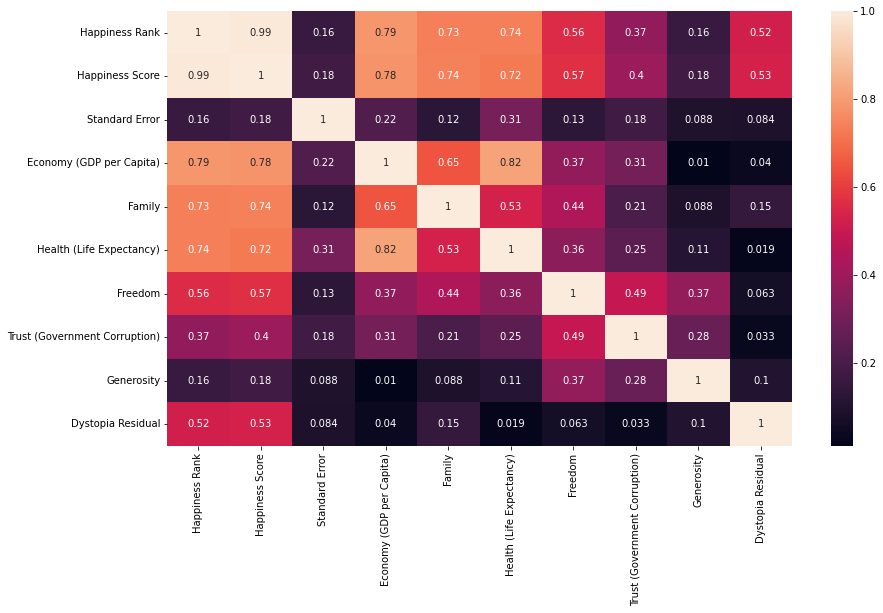

In [17]:
df_corr = df.corr().abs() # This code will get the coffficient of one variable vs other variable(Relationship)

plt.figure(figsize = (14,8))
sns.heatmap (df_corr, annot = True,annot_kws={'size':10}) # we can adjust the size whatever we want
plt.show()

In [18]:
df.drop(columns=['Country','Region'],inplace=True)

### Seprating Features and label

In [19]:
x = df.drop('Happiness Score',axis=1)
y = df['Happiness Score']

In [20]:
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [21]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

### Using Standard Scalarization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.721000,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-1.699075,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-1.677149,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,-1.655224,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.633299,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,1.633576,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,1.655501,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.677427,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,1.699352,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [23]:
df.dtypes

Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

### Finding best Random State

In [24]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.7)

In [36]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
print(f"Regression R2:{lr.score(x_test,y_test)}")

Regression R2:0.999999944339375
